In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
y_test[:10]
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
classes_dict={"airplane":0,"automobile":1,"bird":2,"cat":3,"deer":4,"dog":5,"frog":6,"horse":7,"ship":8,"truck":9}

In [12]:
classes_dict.keys()

dict_keys(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [13]:
classes_dict.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [15]:
classes[:4]

['airplane', 'automobile', 'bird', 'cat']

In [16]:
classes_dict.keys()

dict_keys(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [17]:
classes.index('airplane')

0

In [18]:
list(classes_dict.keys()).index("airplane")

0

In [19]:
y_train[1]

9

In [20]:

unique_labels=np.unique(y_test)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
def plot(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

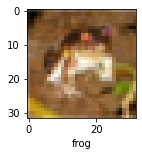

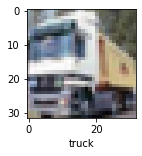

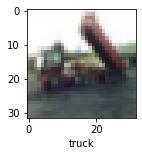

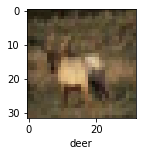

In [22]:
for index in range(4):
  plot(X_train,y_train,index)

In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [63]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8148 - accuracy: 0.3522
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6252 - accuracy: 0.4267
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5438 - accuracy: 0.4549
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4841 - accuracy: 0.4773
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4332 - accuracy: 0.4954
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3909 - accuracy: 0.5124
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3506 - accuracy: 0.5258
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3152 - accuracy: 0.5372
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2841 - accuracy: 0.5473
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.250

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      1000
           1       0.63      0.74      0.68      1000
           2       0.42      0.41      0.42      1000
           3       0.46      0.26      0.33      1000
           4       0.33      0.71      0.46      1000
           5       0.51      0.38      0.43      1000
           6       0.73      0.37      0.49      1000
           7       0.60      0.65      0.62      1000
           8       0.75      0.60      0.67      1000
           9       0.62      0.59      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.53     10000
weighted avg       0.57      0.54      0.53     10000



In [34]:
y_pred[0]

array([2.5999758e-02, 8.0061682e-02, 8.7510057e-02, 5.6733018e-01,
       1.3293938e-01, 7.6474771e-02, 6.0942252e-03, 3.0307786e-04,
       1.8738210e-02, 4.5486097e-03], dtype=float32)

In [37]:
y_pred_classes[0]

3

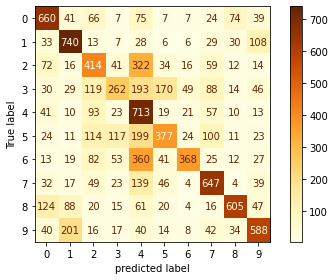

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred_classes,
                                                cmap=plt.cm.YlOrBr)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.tight_layout()
plt.savefig('classification_1.png', dpi=300)  

In [47]:
y_pred[0]

array([2.5999758e-02, 8.0061682e-02, 8.7510057e-02, 5.6733018e-01,
       1.3293938e-01, 7.6474771e-02, 6.0942252e-03, 3.0307786e-04,
       1.8738210e-02, 4.5486097e-03], dtype=float32)

In [48]:
np.argmax(y_pred[0])

3

In [49]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [51]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5998 - accuracy: 0.7913
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5622 - accuracy: 0.8046
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5367 - accuracy: 0.8123
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5065 - accuracy: 0.8232
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4825 - accuracy: 0.8308
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4574 - accuracy: 0.8386
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4324 - accuracy: 0.8471
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4082 - accuracy: 0.8558
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3850 - accuracy: 0.8640
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.370

In [52]:
y_pred=cnn.predict(X_test)
y_pred

array([[3.70836146e-02, 5.11904865e-08, 4.12266127e-06, ...,
        1.34413325e-08, 5.97173907e-02, 1.51493068e-10],
       [1.26666109e-05, 1.83192510e-02, 9.98368394e-14, ...,
        4.53288055e-14, 9.81667638e-01, 4.80953076e-07],
       [1.91589657e-04, 9.99647498e-01, 6.87931978e-09, ...,
        2.77333889e-08, 1.54605386e-05, 1.42785138e-04],
       ...,
       [4.70705791e-16, 8.54059774e-16, 1.88503623e-06, ...,
        3.88324297e-05, 2.35250708e-10, 2.99836492e-15],
       [2.40919580e-05, 2.88268029e-06, 3.65268352e-05, ...,
        5.17481447e-10, 2.48737670e-05, 5.18460240e-07],
       [1.03088501e-24, 3.25437027e-18, 3.86634310e-17, ...,
        1.00000000e+00, 7.21985530e-27, 9.58935609e-24]], dtype=float32)

In [53]:
y_pred[0]

array([3.70836146e-02, 5.11904865e-08, 4.12266127e-06, 5.01078546e-01,
       4.17432034e-07, 4.02112037e-01, 3.79614130e-06, 1.34413325e-08,
       5.97173907e-02, 1.51493068e-10], dtype=float32)

In [54]:
np.argmax(y_pred[0])

3

In [55]:
pred_classes=[np.argmax(x)for x in y_pred]

In [56]:
pred_classes[:4]

[3, 8, 1, 0]

In [58]:
print("Classification Report: \n", classification_report(y_test,pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70      1000
           1       0.79      0.81      0.80      1000
           2       0.62      0.53      0.57      1000
           3       0.48      0.51      0.50      1000
           4       0.64      0.60      0.62      1000
           5       0.56      0.65      0.60      1000
           6       0.74      0.74      0.74      1000
           7       0.73      0.71      0.72      1000
           8       0.82      0.77      0.80      1000
           9       0.76      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



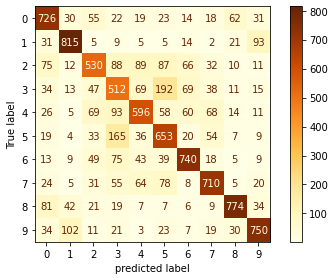

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
ConfusionMatrixDisplay.from_predictions(y_test, 
                                                pred_classes,
                                                cmap=plt.cm.YlOrBr)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.tight_layout()
plt.savefig('classification_1.png', dpi=300)  

In [60]:
len(y_pred)

10000

In [61]:
for i in range(4):
  print(np.argmax(y_pred[i]))

3
8
1
0


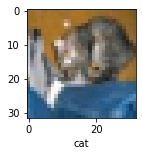

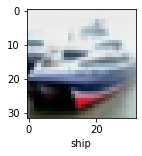

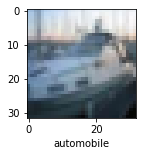

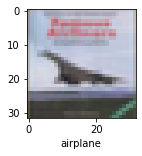

In [62]:
for i in range(4):
  plot(X_test,pred_classes,i)